# Inspect the data

In [2]:
import pandas as pd 

df = pd.read_csv('../data/raw/train.csv')

In [3]:
print("shape:", df.shape)

shape: (891, 12)


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('info: ', df.info())

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB
info:  None


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Find Missing Values

In [20]:
missing_values = df.isna().sum().sort_values(ascending=False)
print(missing_values)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


## Find Duplicates

In [21]:
print(f'Duplicates: {df.duplicated().sum()}')

Duplicates: 0


## Extreme Values

In [9]:
df.min(numeric_only=True)

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

In [10]:
df.max(numeric_only=True)

PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

## EDA

<Axes: xlabel='Sex'>

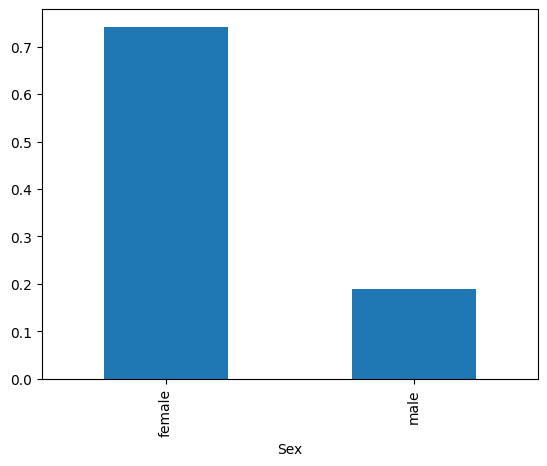

In [12]:
df.groupby("Sex")["Survived"].mean().plot(kind="bar")


<Axes: xlabel='Pclass'>

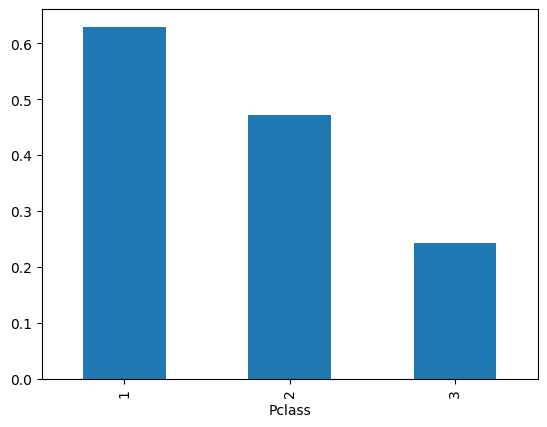

In [13]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

<Axes: xlabel='Embarked'>

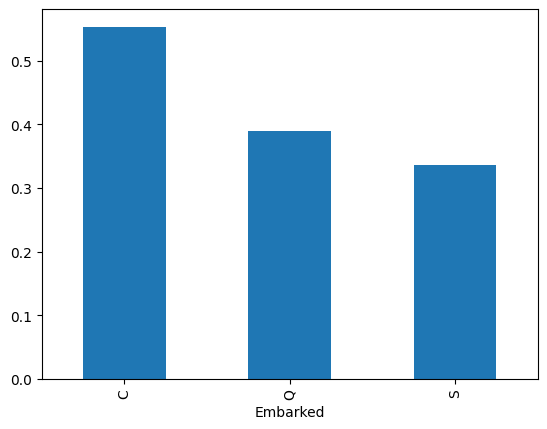

In [16]:
df.groupby('Embarked')['Survived'].mean().plot(kind='bar')

<Axes: xlabel='Age'>

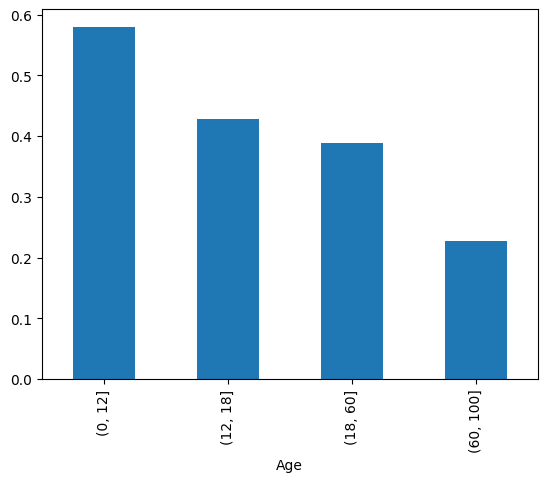

In [23]:
df_age_bining = df.groupby(pd.cut(df["Age"], bins=[0,12,18,60,100]))["Survived"]
df_age_bining.mean().plot(kind="bar")


<Axes: xlabel='FamilySize'>

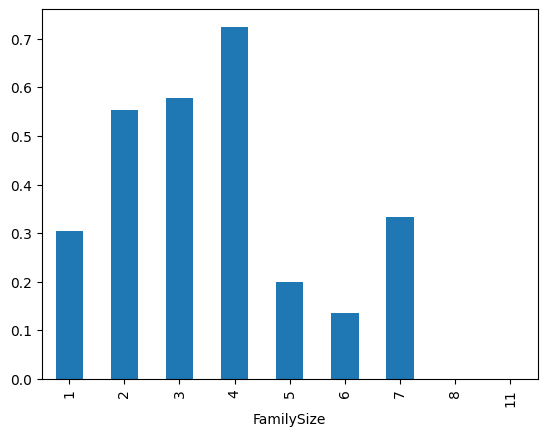

In [21]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df.groupby("FamilySize")["Survived"].mean().plot(kind="bar")

<Axes: xlabel='IsAlone'>

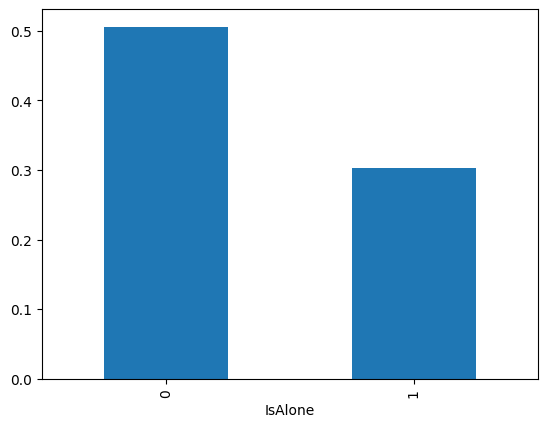

In [22]:
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
df.groupby("IsAlone")["Survived"].mean().plot(kind="bar")

## Drop Columns

In [24]:
df_drop = df.drop(columns=['Name', 'Ticket', 'Cabin' ])

## Fill missing values